In [1]:
load("x.snv.indel.matt.foad.RData")

In [6]:
write.csv(x, gzfile("df_from_R.csv.gz"), row.names = FALSE)

In [1]:
load("mutsig.counts.per.cluster.RData")

In [2]:
row.names(mutsigs) <- gsub(pattern = "_C", replacement = "_Cl.", x = row.names(mutsigs), perl = FALSE)

In [5]:
write.csv(mutsigs, gzfile("mutsigs_branches.csv.gz"))

In [1]:
library(ape)
library(phytools)
library(MCMCglmm)
library(phangorn)
library(ggplot2)
library(ggridges)
library(reshape2)
library(RColorBrewer)
library(viridis)

Warning message:
“package ‘ape’ was built under R version 4.3.3”
Warning message:
“package ‘phytools’ was built under R version 4.3.3”
Loading required package: maps

Warning message:
“package ‘maps’ was built under R version 4.3.3”


ERROR: Error in library(MCMCglmm): there is no package called ‘MCMCglmm’


Warning message in plot.window(...):
“"label.color" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"label.color" is not a graphical parameter”
Warning message in title(...):
“"label.color" is not a graphical parameter”


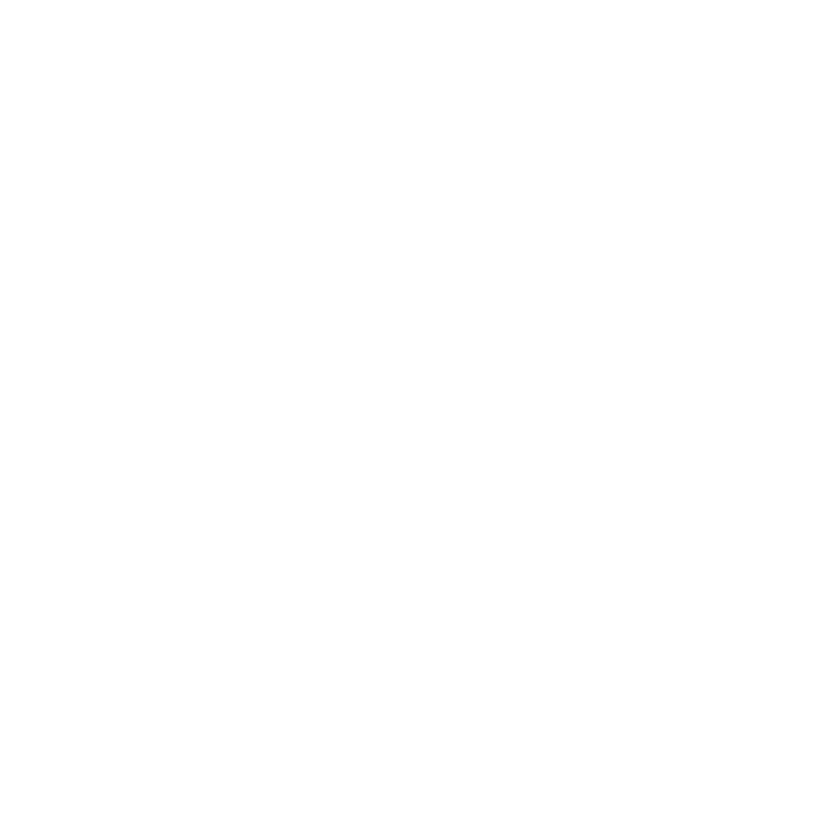

In [6]:
load('Supplementary Code/all.trees.RData')
all.trees <- all.trees.updated

# Remove branches with unknown length, and one outlier with >20,000 mutations
for (i in names(all.trees)) {
    tree <- all.trees[[i]]
    
    # Check whether any edge.length is undefined
    if (any(is.na(tree$edge.length))) {
        tree.edges <- tree$edge 
        tree <- drop.tip(tree, 
                        tip = tree$tip.label[tree.edges[is.na(tree$edge.length), "child"]],
                        collapse.singles = FALSE)
        all.trees[[i]] <- tree
    }
    
    if (any(tree$edge.length > 20000)) {
        tree.edges <- tree$edge 
        tree <- drop.tip(tree, 
                        tip = tree$tip.label[tree.edges[tree$edge.length > 20000, "child"]],
                        collapse.singles = FALSE)
        all.trees[[i]] <- tree
    }
}

# Plot with inverted colors for dark background
plot(all.trees[[1]], 
     main = names(all.trees)[1],
     edge.color = "white",   # Branch lines
     tip.color = "white",    # Tip labels
     label.color = "white",  # Node labels
     bg = "transparent",     # Transparent background
     col.main = "white")     # Title color

In [17]:
all.trees[[i]]


Phylogenetic tree with 27 tips and 2 internal nodes.

Tip labels:
  Cl.1, Cl.10, Cl.11, Cl.12, Cl.13, Cl.14, ...
Node labels:
  Cl.PD, Cl.2

Unrooted; includes branch length(s).

In [19]:
all.trees[[i]]$Nnode

[1] 2

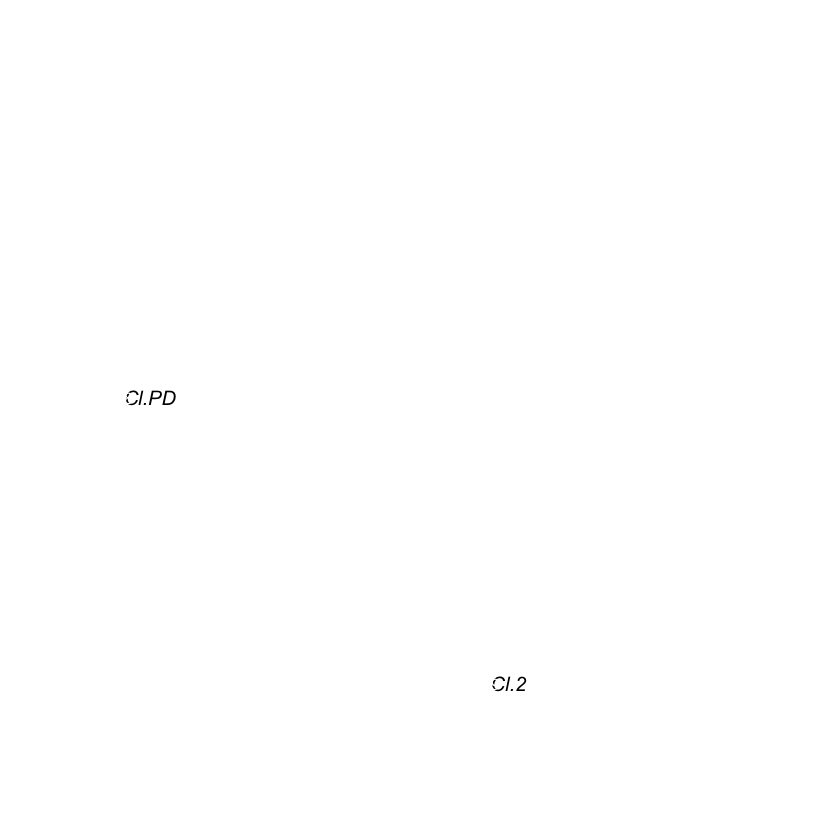

In [23]:
i <- 2
plot(all.trees[[i]], 
     main = names(all.trees)[i],
     show.tip.label = TRUE,    # Show tip labels (white)
     show.node.label = TRUE,   # Show internal node labels
     edge.color = "white",     # Branch colors
     tip.color = "white",      # Tip label colors
     node.color = "white",     # Internal node label colors (NEW)
     edge.width = 1.5,         # Make branches thicker (optional)
     bg = "transparent",       # Transparent background
     col.main = "white")       # Title color

# Alternative for finer control (if node.color doesn't work)
nodelabels(col = "white",      # Force white internal node labels
           cex = 0.8,          # Adjust font size
           frame = "none")     # Remove label backgrounds